<a href="https://colab.research.google.com/github/jso4342/pythonStudy/blob/main/crawling_Melon%2C_Genie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [806 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic

In [13]:
import time 
from selenium import webdriver

# 크롬에서 별도의 웹 브라우저를 띄울 수 없기 때문에 가상화 해야한다 
options = webdriver.ChromeOptions()
options.add_argument('--headless')        # Head-less 설정
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', options=options)

In [92]:
# 멜론

# import requests # 리퀘스트 즉 서버에서 직접 소스를 받을 수 없기 때문에 브라우저에서 소스를 읽어오도록 변경해야함 
from bs4 import BeautifulSoup as bs 
import pandas as pd 


driver.get('https://www.melon.com/chart/')

response = driver.page_source
soup = bs(response)
soup

# 멜론과 지니의 경우 소스를 크롤링하지 못하게 설정해두었다 (보안상의 이유)

<html class="narrow-screen" lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>멜론차트&gt;TOP100&gt;멜론</title>
<meta content="음악서비스, 멜론차트, 멜론TOP100, 최신음악, 인기가요, 뮤직비디오, 앨범, 플레이어, 스트리밍, 다운로드, 아티스트플러스, 아티스트채널" name="keywords"/>
<meta content="No.1 뮤직플랫폼 멜론! 최신 트렌드부터 나를 아는 똑똑한 음악추천까지!" name="description"/>
<meta content="ee85ff6db1fa8f2226bcb671ecb2bcdbcffb6f8b" name="naver-site-verification"/>
<meta content="q4tbTQhmxa4La3OdNLsNOCxrJ_WV6lUlBFrFW4-HqQc" name="google-site-verification"/>
<meta content="357952407588971" property="fb:app_id"/>
<meta content="Melon" property="og:title"/>
<meta content="https://cdnimg.melon.co.kr/resource/image/web/common/logo_melon142x99.png" property="og:image"/>
<meta content="음악이 필요한 순간, 멜론" property="og:description"/>
<meta content="http://www.melon.com/chart/" property="og:url"/>
<meta content="website" property="og:type"/>
<meta content="멜론" property="o

In [93]:
len(soup.select('tr'))
len(soup.select('tbody > tr'))

100

In [94]:
songs = soup.select('tbody > tr')
song = songs[0]

# rank = song.select('span.rank')[0].text
# title = song.select('div.ellipsis.rank01 > span > a')[0].text
# singer = song.select('div.ellipsis.rank02 > span > a')[0].text

In [95]:
pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [96]:
song_data = []

songs = soup.select('tbody > tr')

for song in songs:
    rank = song.select('span.rank')[0].text
    title = song.select('div.ellipsis.rank01 > span > a')[0].text
    singer = song.select('div.ellipsis.rank02 > span > a')[0].text
    song_data.append(['Melon', rank, title, singer])


df = pd.DataFrame(song_data, columns=['차트명','순위','타이틀','가수'])

df.to_excel('melon.xlsx', index=False)

df

,차트명,순위,타이틀,가수
0,Melon,1,That That (prod. & feat. SUGA of BTS),싸이 (PSY)
1,Melon,2,TOMBOY,(여자)아이들
2,Melon,3,LOVE DIVE,IVE (아이브)
3,Melon,4,사랑인가 봐,멜로망스
4,Melon,5,사랑은 늘 도망가,임영웅
...,...,...,...,...
95,Melon,96,헤픈 우연,헤이즈 (Heize)
96,Melon,97,초대,멜로망스
97,Melon,98,어마어마해,WSG워너비
98,Melon,99,사랑인걸,한동근


In [97]:
# 지니 차트 크롤링

# 지니도 멜론과 마찬가지로 request 접근을 허용하지 않는다.
# 따라서 selenium 을 통해 브라우저

from selenium import webdriver
from bs4 import BeautifulSoup as bs 
import pandas as pd 

driver.get('https://www.genie.co.kr/chart/top200')

response = driver.page_source
soup = bs(response)
soup

<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" dir="ltr" lang="ko" style=""><head>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!--[if lte IE 6]><html dir="ltr" class="no-js ie6"><![endif]-->
<!--[if lte IE 7]><html dir="ltr" class="no-js ie7"><![endif]-->
<!--[if IE 8]><html dir="ltr" class="no-js ie8"><![endif]-->
<!--[if IE 9]><html dir="ltr" class="no-js ie9"><![endif]-->
<!--[if (gte IE 10)|!(IE)]><!--><!--<![endif]-->
<title>지니차트&gt;실시간 - 지니</title>
<meta charset="utf-8"/>
<meta content="d17289f97c7f294985a9b0eb3649a45ac5ceeee2" name="naver-site-verificati

In [98]:
len(soup.select('tr'))


51

In [99]:
songs = soup.select('tr.list')
len(songs)

50

In [100]:
song = songs[0]

In [101]:
# rank
song.select('td.number')[0].text.strip()

  # title
song.select('a.title.ellipsis')[0].text.strip()

  # singer 
song.select('a.artist.ellipsis')[0].text.strip()

'싸이 (Psy)'

In [102]:
song_list = []
songs = soup.select('tr.list')
rank = 1

for song in songs:
    title = song.select('a.title.ellipsis')[0].text.strip()
    singer = song.select('a.artist.ellipsis')[0].text.strip()
    song_list.append(['Genie', rank, title, singer])
    rank += 1

In [103]:
# 지니는 다른 사이트와는 달리 50곡씩 나누어져 있다.
# 파이썬 코드로 다음 페이지로 이동하여 다시 한 번 읽어온다.

next_btn = '#body-content > div.page-nav.rank-page-nav > a:nth-child(2)'  # 다음 순위 버튼 
driver.find_element_by_css_selector(next_btn).click()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: find_element_by_css_selector is deprecated. Please use find_element(by=By.CSS_SELECTOR, value=css_selector) instead
  """


In [104]:
response = driver.page_source
soup = bs(response)

songs = soup.select('tr.list')

for song in songs:
    title = song.select('a.title.ellipsis')[0].text.strip()
    singer = song.select('a.artist.ellipsis')[0].text.strip()
    song_list.append(['Genie', rank, title, singer])
    rank += 1

In [105]:
song_list

[['Genie', 1, 'That That (Prod. & Feat. SUGA of BTS)', '싸이 (Psy)'],
 ['Genie', 2, 'TOMBOY', '(여자)아이들'],
 ['Genie', 3, 'LOVE DIVE', 'IVE (아이브)'],
 ['Genie', 4, '사랑인가 봐', '멜로망스 (MeloMance)'],
 ['Genie', 5, '봄여름가을겨울 (Still Life)', 'BIGBANG (빅뱅)'],
 ['Genie', 6, '사랑은 늘 도망가', '임영웅'],
 ['Genie', 7, '나의 X에게', '경서'],
 ['Genie', 8, '우리들의 블루스', '임영웅'],
 ['Genie', 9, 'FEARLESS', 'LE SSERAFIM (르세라핌)'],
 ['Genie', 10, '해요 (2022)', '#안녕'],
 ['Genie', 11, 'LOVE me', "BE'O (비오)"],
 ['Genie', 12, '다시 만날 수 있을까', '임영웅'],
 ['Genie', 13, 'Feel My Rhythm', 'Red Velvet (레드벨벳)'],
 ['Genie', 14, '취중고백', '김민석 (멜로망스)'],
 ['Genie', 15, '정이라고 하자 (Feat. 10CM)', 'BIG Naughty (서동현)'],
 ['Genie', 16, '이제 나만 믿어요', '임영웅'],
 ['Genie', 17, '신호등', '이무진'],
 ['Genie', 18, '무지개', '임영웅'],
 ['Genie', 19, 'ZOOM', '제시'],
 ['Genie', 20, 'MY BAG', '(여자)아이들'],
 ['Genie', 21, '아버지', '임영웅'],
 ['Genie', 22, '다정히 내 이름을 부르면', '경서예지 & 전건호'],
 ['Genie', 23, 'HOT', '세븐틴 (SEVENTEEN)'],
 ['Genie', 24, 'GANADARA (Feat. 아이유)', '박재범'],
 ['Genie'

In [106]:
import pandas as pd 
df = pd.DataFrame(song_list, columns= ['서비스', '순위', '제목', '가수'])
df

,서비스,순위,제목,가수
0,Genie,1,That That (Prod. & Feat. SUGA of BTS),싸이 (Psy)
1,Genie,2,TOMBOY,(여자)아이들
2,Genie,3,LOVE DIVE,IVE (아이브)
3,Genie,4,사랑인가 봐,멜로망스 (MeloMance)
4,Genie,5,봄여름가을겨울 (Still Life),BIGBANG (빅뱅)
...,...,...,...,...
95,Genie,96,어제처럼,폴킴
96,Genie,97,IF you leave me,세븐틴 (SEVENTEEN)
97,Genie,98,SMILEY (Feat. BIBI),YENA (최예나)
98,Genie,99,오늘도 빛나는 너에게 (To You My Light) (Feat.이라온),마크툽 (Maktub)


<html lang="ko"><head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 " property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&amp;date=20220607" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta content="
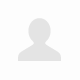
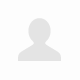

In [109]:
# 네이버 영화 랭킹순 (현재 상영영화)
# 순위 영화명 평점
# 크롤링하여 데이터 프레임으로 만들어 엑셀 제출 

from selenium import webdriver
from bs4 import BeautifulSoup as bs 
import pandas as pd 

driver.get('https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=cur&date=20220607')

response = driver.page_source
soup = bs(response)
soup

In [176]:
movies = soup.select('tr')

td_list = []

for i in range(2, len(movies)):
  td_list.append(movies[i])

print(td_list)

[<tr>
<td class="ac"><img alt="01" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_r01.gif" width="14"/></td>
<td class="title">
<div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=192608" title="범죄도시2">범죄도시2</a>
</div>
</td>
<!-- 평점순일 때 평점 추가하기  -->
<td><div class="point_type_2"><div class="mask" style="width:95.20000457763672%"><img alt="" height="14" src="https://ssl.pstatic.net/imgmovie/2007/img/common/point_type_2_bg_on.gif" width="79"/></div></div></td>
<td class="point">9.52</td>
<td class="ac"><a class="txt_link" href="/movie/point/af/list.naver?st=mcode&amp;sword=192608">평점주기</a></td>
<!----------------------------------------->
<td class="ac"><img alt="na" class="arrow" height="10" src="https://ssl.pstatic.net/imgmovie/2007/img/common/icon_na_1.gif" width="7"/></td>
<td class="range ac">0</td>
</tr>, <tr>
<td class="ac"><img alt="02" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_r02.gif" width="14"/></td>
<td class

In [193]:


# 2 부터 시작
# movie = movies[2]

# # title
# movie.select('div.tit5')[0].text.strip()


# # point
# movie.select('td.point')[0].text.strip()

td_list[31]

<tr>
<td class="ac"><img alt="30" height="13" src="https://ssl.pstatic.net/imgmovie/2007/img/common/bullet_r_g30.gif" width="14"/></td>
<td class="title">
<div class="tit5">
<a href="/movie/bi/mi/basic.naver?code=191646" title="쥬라기 월드: 도미니언">쥬라기 월드: 도미니언</a>
</div>
</td>
<!-- 평점순일 때 평점 추가하기  -->
<td><div class="point_type_2"><div class="mask" style="width:61.90000057220459%"><img alt="" height="14" src="https://ssl.pstatic.net/imgmovie/2007/img/common/point_type_2_bg_on.gif" width="79"/></div></div></td>
<td class="point">6.19</td>
<td class="ac"><a class="txt_link" href="/movie/point/af/list.naver?st=mcode&amp;sword=191646">평점주기</a></td>
<!----------------------------------------->
<td class="ac"><img alt="down" class="arrow" height="10" src="https://ssl.pstatic.net/imgmovie/2007/img/common/icon_down_1.gif" width="7"/></td>
<td class="range ac">3</td>
</tr>

In [183]:
len(td_list)

36

In [205]:
# 네이버 영화 랭킹순 (현재 상영영화)
# 순위 영화명 평점
# 크롤링하여 데이터 프레임으로 만들어 엑셀 제출 


movie_rank = []

response = driver.page_source
soup = bs(response)


movies = soup.select('tr')
movies

rank = 1

for i in range(0, 10):
    title = td_list[i].select('div.tit5')[0].text.strip()
    point = td_list[i].select('td.point')[0].text.strip()
    movie_rank.append(['Naver Movie', rank, title,  point])
    rank += 1

for i in range(11, 21):
    title = td_list[i].select('div.tit5')[0].text.strip()
    point = td_list[i].select('td.point')[0].text.strip()
    movie_rank.append(['Naver Movie', rank, title,  point])
    rank += 1
    

for i in range(22, 32):
    title = td_list[i].select('div.tit5')[0].text.strip()
    point = td_list[i].select('td.point')[0].text.strip()
    movie_rank.append(['Naver Movie', rank, title, point])
    rank += 1

for i in range(33, 35):
    title = td_list[i].select('div.tit5')[0].text.strip()
    point = td_list[i].select('td.point')[0].text.strip()
    movie_rank.append(['Naver Movie', rank, title, point])
    rank += 1
    


import pandas as pd 
df = pd.DataFrame(movie_rank, columns= ['서비스', '순위', '제목', '평점'])
df


df.to_excel('naverMovie.xlsx', index=False)



In [190]:
for i in range(11, 21):
    title = td_list[i].select('div.tit5')[0].text.strip()
    point = td_list[i].select('td.point')[0].text.strip()
    movie_rank.append(['Naver Movie', rank, title])
    rank += 1

In [194]:
for i in range(22, 31):
    title = td_list[i].select('div.tit5')[0].text.strip()
    point = td_list[i].select('td.point')[0].text.strip()
    movie_rank.append(['Naver Movie', rank, title])
    rank += 1

In [195]:
movie_rank

[['Naver Movie', 1, '범죄도시2'],
 ['Naver Movie', 2, '씽2게더'],
 ['Naver Movie', 3, '극장판 주술회전 0'],
 ['Naver Movie', 4, '어느 가족'],
 ['Naver Movie', 5, '해피 투게더'],
 ['Naver Movie', 6, '코다'],
 ['Naver Movie', 7, '러브레터'],
 ['Naver Movie', 8, '중경삼림'],
 ['Naver Movie', 9, '그렇게 아버지가 된다'],
 ['Naver Movie', 10, '화양연화'],
 ['Naver Movie', 11, '배드 가이즈'],
 ['Naver Movie', 12, '걸어도 걸어도'],
 ['Naver Movie', 13, '라라랜드'],
 ['Naver Movie', 14, '태풍이 지나가고'],
 ['Naver Movie', 15, '아비정전'],
 ['Naver Movie', 16, '드라이브 마이 카'],
 ['Naver Movie', 17, '어나더 라운드'],
 ['Naver Movie', 18, '우연과 상상'],
 ['Naver Movie', 19, '문라이즈 킹덤'],
 ['Naver Movie', 20, '바닷마을 다이어리'],
 ['Naver Movie', 21, '배드 가이즈'],
 ['Naver Movie', 22, '걸어도 걸어도'],
 ['Naver Movie', 23, '라라랜드'],
 ['Naver Movie', 24, '태풍이 지나가고'],
 ['Naver Movie', 25, '아비정전'],
 ['Naver Movie', 26, '드라이브 마이 카'],
 ['Naver Movie', 27, '어나더 라운드'],
 ['Naver Movie', 28, '우연과 상상'],
 ['Naver Movie', 29, '문라이즈 킹덤'],
 ['Naver Movie', 30, '릴리 슈슈의 모든 것'],
 ['Naver Movie', 31, '하나와 앨리스'],
 ['Na

In [208]:
movies = soup.select('div.tit5 > a')
movie = movies[0]
movie.text

'범죄도시2'

In [209]:
points = soup.select('td.point')
point = points[0]
point.text

'9.52'

In [ ]:
movieList = []

rank = 1
for each in range(len(soup.select('td.title'))):
  

In [235]:
# 날씨 크롤링


from selenium import webdriver
from bs4 import BeautifulSoup as bs 
import pandas as pd 

driver.get('https://weather.naver.com/')

response = driver.page_source
soup = bs(response)
soup

now = soup.select('#now > div > div.weather_area > div.weather_now > div > strong')[0].text.strip()
status = soup.select('#now > div > div.weather_area > div.weather_now > p > span.weather')[0].text

print(f'현재 온도 : {now[5:]}')
print(f'현재 상태 : {status}')

현재 온도 : 23.9°
현재 상태 : 흐림
